In [1]:
import pandas as pd
movies = pd.read_csv('movies.csv')
links = pd.read_csv('links.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
print(movies.head())
print(links.head())
print(ratings.head())
print(tags.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   userId

In [5]:
print(movies.info())
print(links.info())
print(ratings.info())
print(tags.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 no

Number of movies: 9724
Number of users: 610


<AxesSubplot: >

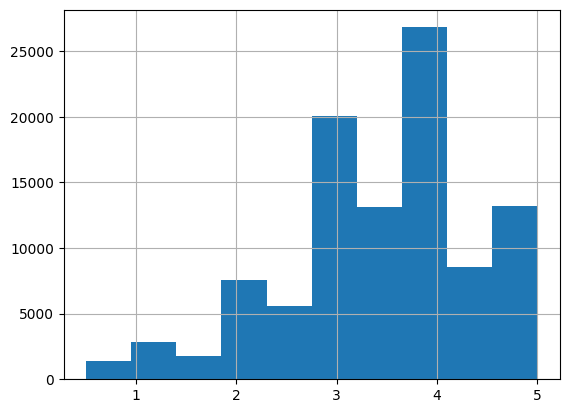

In [2]:
ratings = pd.read_csv('ratings.csv')

print(f"Number of movies: {ratings['movieId'].nunique()}")
print(f"Number of users: {ratings['userId'].nunique()}")

ratings['rating'].hist()

In [7]:
print(movies.isnull().sum())
print(ratings.isnull().sum())
print(tags.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [20]:
movie_ratings = pd.merge(ratings, movies, on='movieId')
movie_ratings

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [21]:
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [41]:
movies_ratings.isnull().sum()


movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [44]:
final_dataset = movies_ratings.pivot(index='movieId',columns='userId',values='rating')
print(final_dataset.head())

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  NaN  NaN  NaN  4.0  NaN  4.5  NaN  NaN  NaN  ...  4.0  NaN  4.0   
2        NaN  NaN  NaN  NaN  NaN  4.0  NaN  4.0  NaN  NaN  ...  NaN  4.0  NaN   
3        4.0  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4        NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
5        NaN  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  NaN  NaN  2.0  NaN  NaN  
3        NaN  NaN  NaN  NaN  2.0  NaN  NaN  
4        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5        3.0  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 610 columns]


In [45]:
final_dataset.fillna(0, inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


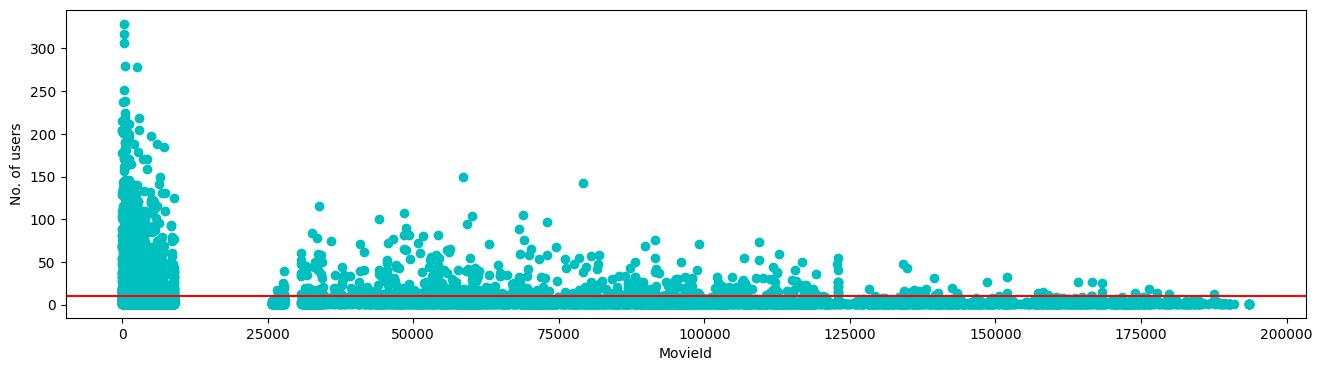

In [52]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(user_count.index, user_count, color='c')
plt.axhline(y=10, color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users')
plt.show()


In [53]:
import tensorflow as tf

user_item_matrix = movie_ratings_data.pivot_table(index='userId', columns='title', values='rating')

# Performing matrix factorization using SGD
k = 50
epochs = 100
gamma = 0.1
lmbda = 0.1

num_users, num_items = user_item_matrix.shape
user_embedding = tf.Variable(tf.random.normal([num_users, k], 0.0, 0.1), name='user_embedding')
item_embedding = tf.Variable(tf.random.normal([num_items, k], 0.0, 0.1), name='item_embedding')

# Define the matrix factorization model
def matrix_factorization_sgd(user_movie_ratings, num_factors, lambda_val, num_epochs, learning_rate):
    num_users, num_movies = user_movie_ratings.shape
    user_matrix = np.random.normal(scale=1.0/num_factors, size=(num_users, num_factors))
    movie_matrix = np.random.normal(scale=1.0/num_factors, size=(num_movies, num_factors))
    for epoch in range(num_epochs):
        for user in range(num_users):
            for movie in range(num_movies):
                if user_movie_ratings[user, movie] > 0:
                    error = user_movie_ratings[user, movie] - np.dot(user_matrix[user], movie_matrix[movie])
                    user_matrix[user] += learning_rate * (error * movie_matrix[movie] - lambda_val * user_matrix[user])
                    movie_matrix[movie] += learning_rate * (error * user_matrix[user] - lambda_val * movie_matrix[movie])
    return user_matrix, movie_matrix

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 610 samples in 0.000s...
[t-SNE] Computed neighbors for 610 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 610 / 610
[t-SNE] Mean sigma: 0.235115
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.831104
[t-SNE] KL divergence after 300 iterations: 2.196332
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9719 samples in 0.000s...
[t-SNE] Computed neighbors for 9719 samples in 2.476s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9719
[t-SNE] Computed conditional probabilities for sample 2000 / 9719
[t-SNE] Computed conditional probabilities for sample 3000 / 9719
[t-SNE] Computed conditional probabilities for sample 4000 / 9719
[t-SNE] Computed conditional probabilities for sample 5000 / 9719
[t-SNE] Computed conditional probabilities for sample 6000 / 9719
[t-SNE] Computed conditional probabilities for sample 7000 / 9719
[t-SNE] Computed conditional pro

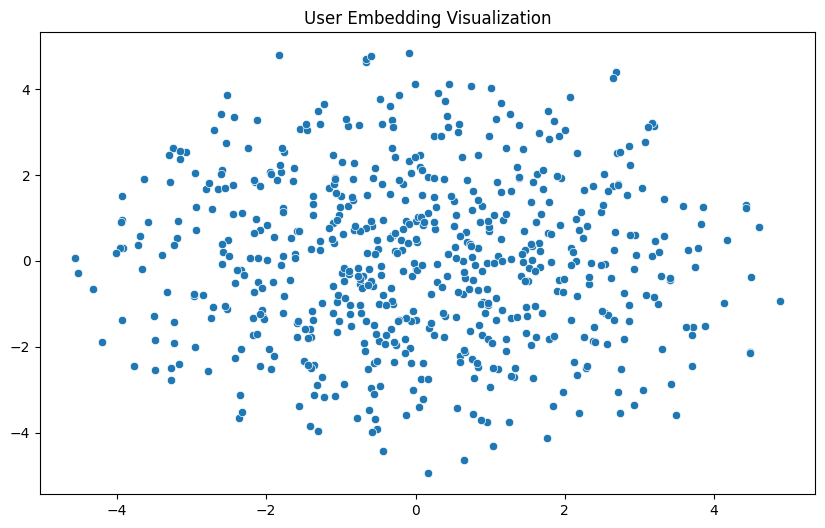

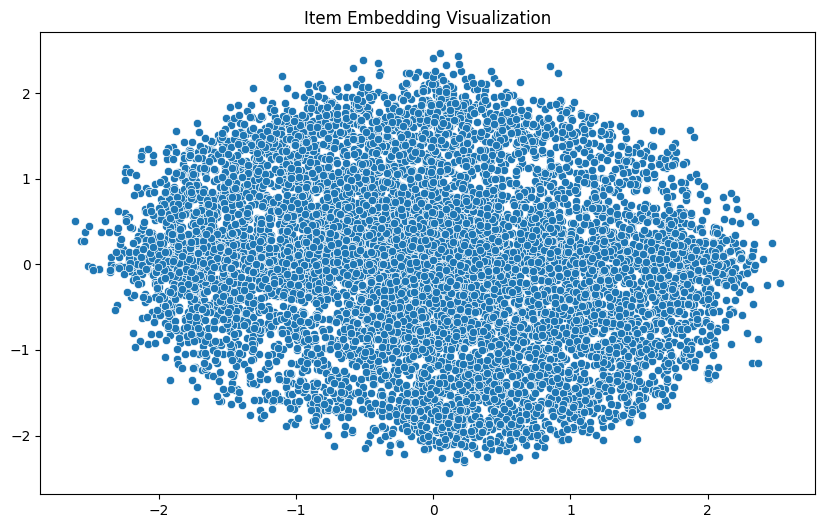

In [54]:
# Embedding Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_user_embedding = tsne.fit_transform(user_embedding.numpy())
tsne_item_embedding = tsne.fit_transform(item_embedding.numpy())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_user_embedding[:, 0], y=tsne_user_embedding[:, 1])
plt.title('User Embedding Visualization')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_item_embedding[:, 0], y=tsne_item_embedding[:, 1])
plt.title('Item Embedding Visualization')
plt.show()